In [7]:
! python -m pip install --upgrade pip
! pip install --user pandas
! pip install --user matplotlib
! pip install --user seaborn==0.9.0

In [2]:
import pandas as pd

import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [3]:
path_to_data = 'https://gist.githubusercontent.com/Chepubelja/6d4aa90612f7c95f4235890e1ff9b1b9/raw/06ea57efa2561096f3700418eacde34ae98b5902/population_prospects.csv'
data = pd.read_csv(path_to_data)
data.head()

,year,population,type
0,1950,37297.640,estimate
1,1951,37815.540,estimate
2,1952,38360.078,estimate
3,1953,38915.814,estimate
4,1954,39471.403,estimate


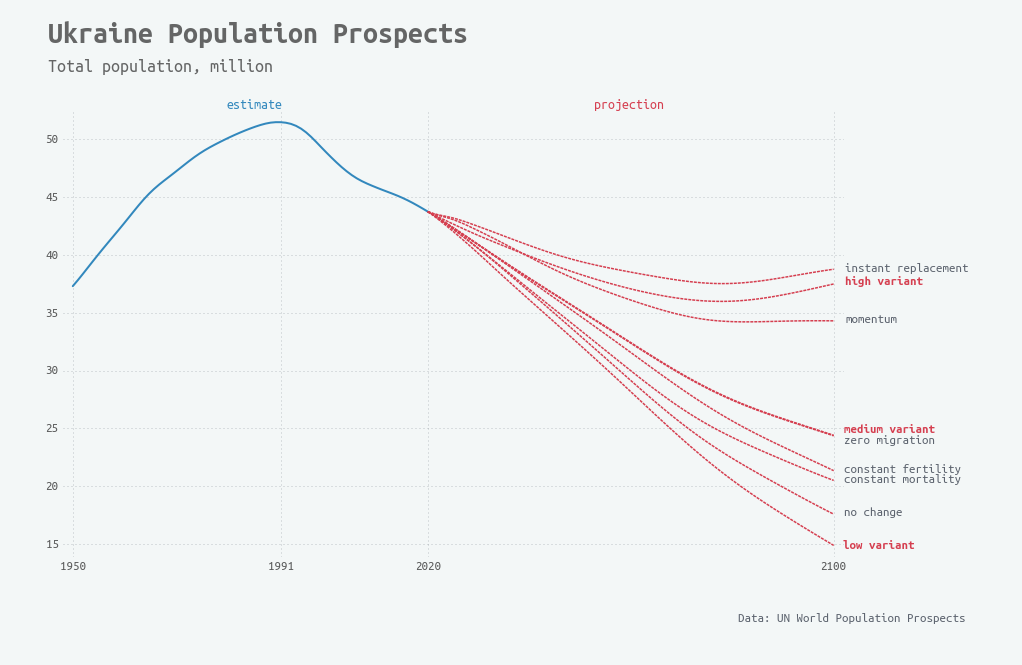

In [6]:
# Custom fonts preparation
mono_r = fm.FontProperties(fname='ubuntu-mono/UbuntuMono-R.ttf')
mono_b = fm.FontProperties(fname='ubuntu-mono/UbuntuMono-B.ttf')

# Set color of background
sns.set(rc={'axes.facecolor':'#F3F7F7', 'figure.facecolor':'#F3F7F7'})

fig = plt.figure(figsize=(14, 8))
for d_type in data['type'].unique():
    if d_type == 'estimate':
        ax = sns.lineplot(x="year", y="population", data=data[data['type'] == d_type], color='#3288bd')
    else:
        ax = sns.lineplot(x="year", y="population", data=data[data['type'] == d_type], color='#d53e4f')

# Increased weight of estimate line
plt.setp(ax.lines[0], linewidth=2.0)

# Removed x and y axis labels
ax.set_xlabel('')
ax.set_ylabel('')

# Added title and subtitle
ax.text(x=0.25, y=1.14, s='Ukraine Population Prospects', fontproperties=mono_b, alpha=0.7, fontsize=30, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.125, y=1.08, s='Total population, million', fontproperties=mono_r, fontsize=18, alpha=0.7, ha='center', va='bottom', transform=ax.transAxes)

# Estimate + projection texts
ax.text(x=0.245, y=1.0, s='estimate', color='#3288bd', fontproperties=mono_r, fontsize=14, alpha=1, ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.725, y=1.0, s='projection', color='#d53e4f', fontproperties=mono_r, fontsize=14, alpha=1, ha='center', va='bottom', transform=ax.transAxes)

# Added types
ax.text(x=1.08, y=0.6345, s='instant replacement', color='#5D646F', fontproperties=mono_r, fontsize=13, alpha=1, ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=1.052, y=0.605, s='high variant', color='#d53e4f', fontproperties=mono_b, fontsize=13, alpha=1, ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=1.035, y=0.52, s='momentum', color='#5D646F', fontproperties=mono_r, fontsize=13, alpha=1, ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=1.058, y=0.275, s='medium variant', color='#d53e4f', fontproperties=mono_b, fontsize=13, alpha=1, ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=1.058, y=0.25, s='zero migration', color='#5D646F', fontproperties=mono_r, fontsize=13, alpha=1, ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=1.075, y=0.184, s='constant fertility', color='#5D646F', fontproperties=mono_r, fontsize=13, alpha=1, ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=1.075, y=0.161, s='constant mortality', color='#5D646F', fontproperties=mono_r, fontsize=13, alpha=1, ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=1.038, y=0.089, s='no change', color='#5D646F', fontproperties=mono_r, fontsize=13, alpha=1, ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=1.045, y=0.015, s='low variant', color='#d53e4f', fontproperties=mono_b, fontsize=13, alpha=1, ha='center', va='bottom', transform=ax.transAxes)

# Added source of the data
ax.text(x=1.01, y=-0.15, s='Data: UN World Population Prospects', color='#5D646F', fontproperties=mono_r, fontsize=13, alpha=1, ha='center', va='bottom', transform=ax.transAxes)

# Changed grid color and made it dotted
plt.grid(color='#5D646F', linestyle='dotted', linewidth=1.0, alpha=0.35)

# Removed bottom and left outline
sns.despine(bottom=True, left=True, ax=ax)

for i in range(1, 10):
  
    # Making all projections dotted
    ax.lines[i].set_linestyle("--")

    # Making all dots spacing and length the same as on the original plot
    ax.lines[i].set_dashes([3, 1])

# Set limits for x axis
ax.set(xlim=(min(data['year'] - 2), max(data['year'] + 2)), ylim=(min(data['population']) - 1000, max(data['population']) + 1000))

# Setting certain years to take as ticks
ax.set_xticks([1950, 1991, 2020, 2100]);

# Changing font family for x tick labels
for label in ax.get_xticklabels():
    label.set_fontproperties(mono_r)

# Changing font family for y tick labels
for label in ax.get_yticklabels():
    label.set_fontproperties(mono_r)

# Changing transparency of tick labels
plt.setp(ax.get_yticklabels(), alpha=0.75)
plt.setp(ax.get_xticklabels(), alpha=0.75);

# Added padding as new invisible axes
top_offset = -0.05
left_offset = 0.07
right_offset = -0.05
bottom_offset = -0.05
hgap = 0
ax_width = 1.02 - left_offset - right_offset
ax_height = (1.03 - top_offset - bottom_offset - hgap)
ax_add = fig.add_axes([left_offset, bottom_offset, ax_width, ax_height])

# Hide grid lines
ax_add.grid(False)

# Removing unnecessary tick marks
ax.tick_params(left=False, bottom=False, top=False, right=False)

# Hide axes ticks
ax_add.set_xticks([])
ax_add.set_yticks([])
ax_add.set_zorder(-1)

# Removing unnecessary box outline
ax_add.axis('off');

# Setting proper font size for x tick labels
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)

# Setting proper font size for y tick labels
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)

# Set what values to show on x and y ticks
ax.set_xticks([1950, 1991, 2020, 2100]);
ax.set_yticklabels(["", "15", "20", "25", "30", "35", "40", "45", "50"]);

# Put ticks inside (closer to axis)
ax.tick_params(direction='in')